In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
train_data = pd.read_csv('train.csv')
train_data = train_data.iloc[: , 1:]
train_data = train_data.set_index('id')
train_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Flight Distance'}>,
        <Axes: title={'center': 'Inflight wifi service'}>,
        <Axes: title={'center': 'Departure/Arrival time convenient'}>],
       [<Axes: title={'center': 'Ease of Online booking'}>,
        <Axes: title={'center': 'Gate location'}>,
        <Axes: title={'center': 'Food and drink'}>,
        <Axes: title={'center': 'Online boarding'}>],
       [<Axes: title={'center': 'Seat comfort'}>,
        <Axes: title={'center': 'Inflight entertainment'}>,
        <Axes: title={'center': 'On-board service'}>,
        <Axes: title={'center': 'Leg room service'}>],
       [<Axes: title={'center': 'Baggage handling'}>,
        <Axes: title={'center': 'Checkin service'}>,
        <Axes: title={'center': 'Inflight service'}>,
        <Axes: title={'center': 'Cleanliness'}>],
       [<Axes: title={'center': 'Departure Delay in Minutes'}>,
        <Axes: title={'center': 'Arrival Delay in Minutes'}>, <A

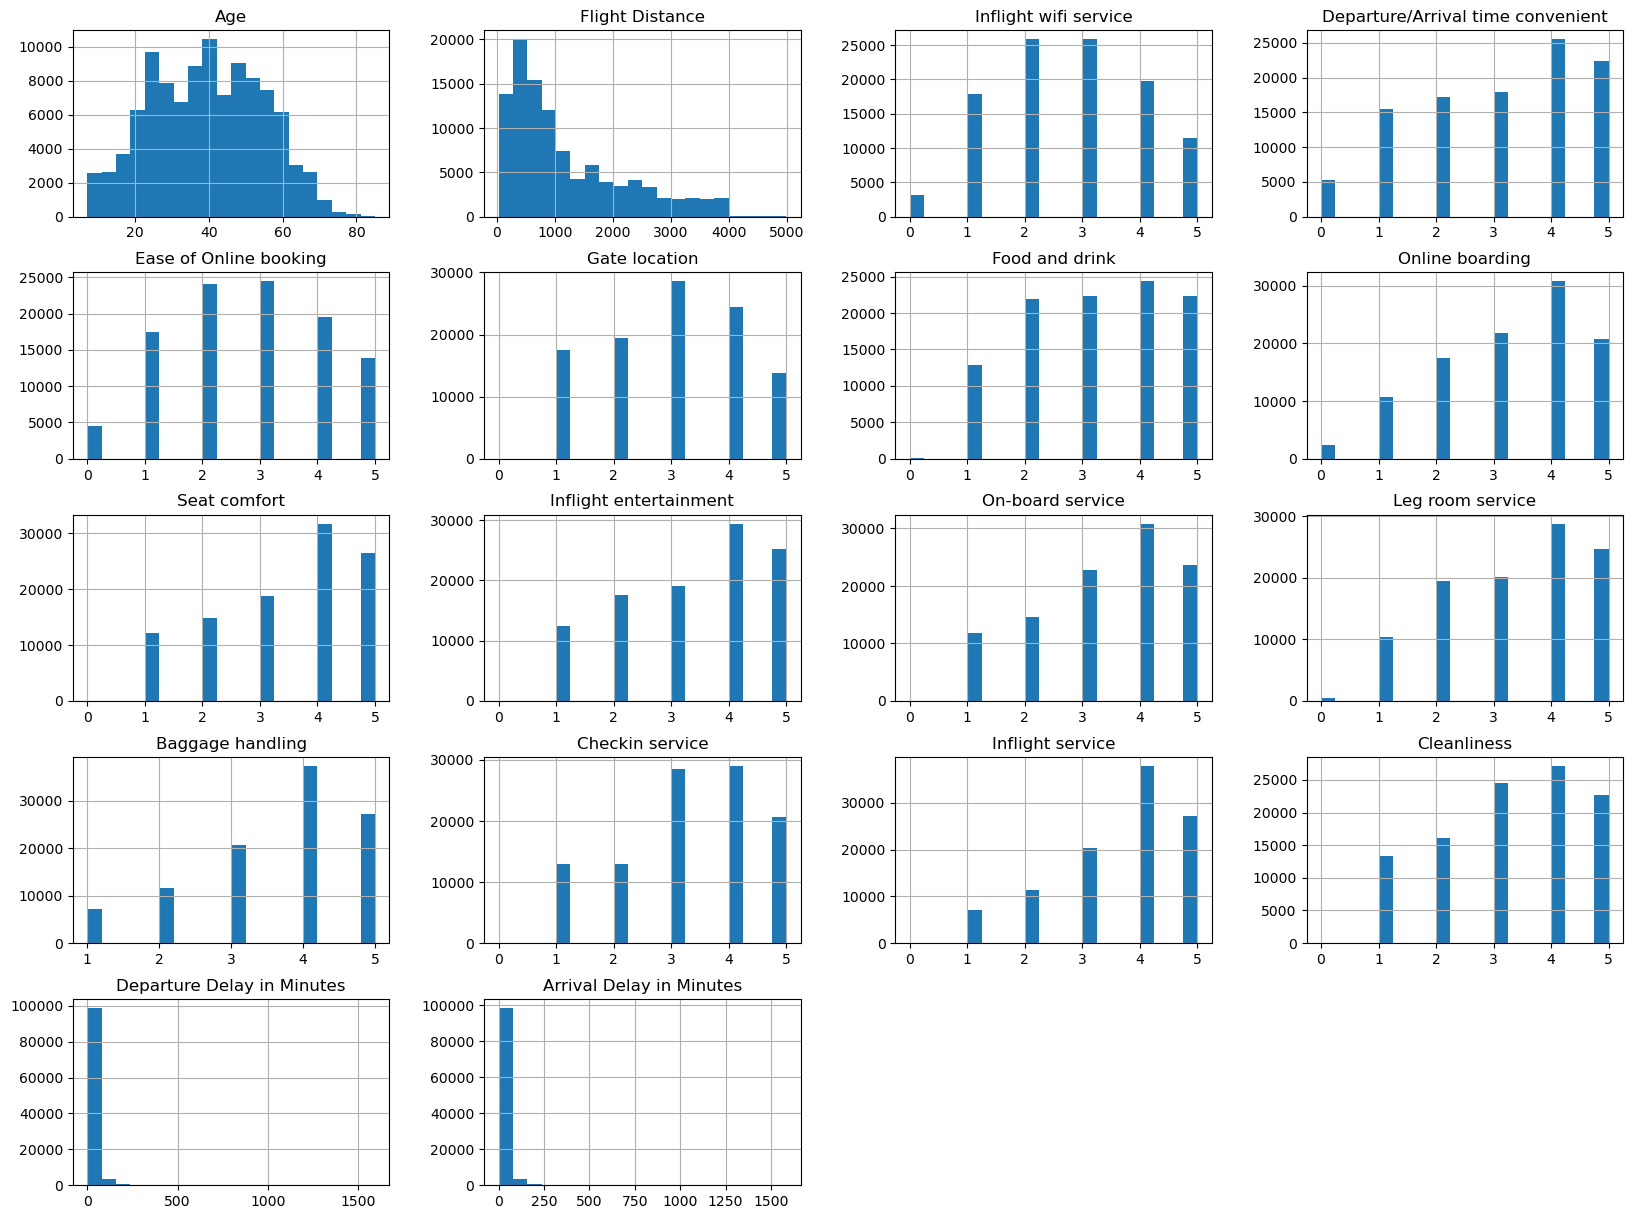

In [54]:
train_data.hist(bins=20, figsize=(20,15))

<Axes: xlabel='satisfaction'>

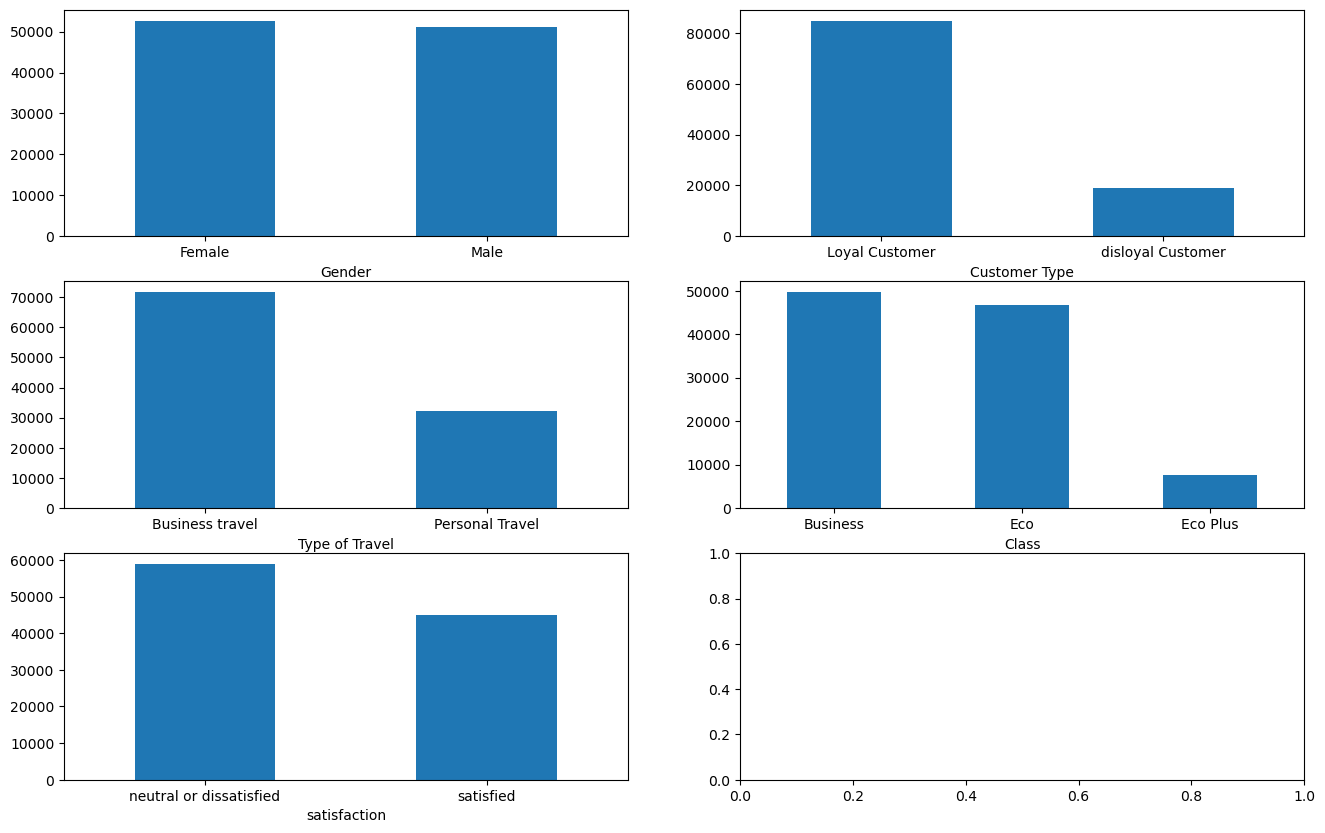

In [55]:
categorical_data = ['Gender', 'Customer Type','Type of Travel' , 'Class', 'satisfaction']

fig,axes = plt.subplots(3,2, figsize=(16,10))

train_data['Gender'].value_counts().plot(kind='bar', ax=axes[0][0], rot=0)
train_data['Customer Type'].value_counts().plot(kind='bar', ax=axes[0][1], rot=0)
train_data['Type of Travel'].value_counts().plot(kind='bar', ax=axes[1][0], rot=0)
train_data['Class'].value_counts().plot(kind='bar', ax=axes[1][1], rot=0)
train_data['satisfaction'].value_counts().plot(kind='bar', ax=axes[2][0], rot=0)


In [56]:
train_data['Arrival Delay in Minutes'].fillna(train_data['Arrival Delay in Minutes'].mean(), inplace=True)

In [85]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

X_train = train_data.drop(['satisfaction'],axis=1)
y_train = train_data['satisfaction']

categorical_data = ['Gender', 'Customer Type','Type of Travel' , 'Class']

transformer = make_column_transformer(
    (OneHotEncoder(), categorical_data),
    remainder='passthrough')

transformed = transformer.fit_transform(X_train)
transformed_df = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names_out()
)

transformed_df.head()

,onehotencoder__Gender_Female,onehotencoder__Gender_Male,onehotencoder__Customer Type_Loyal Customer,onehotencoder__Customer Type_disloyal Customer,onehotencoder__Type of Travel_Business travel,onehotencoder__Type of Travel_Personal Travel,onehotencoder__Class_Business,onehotencoder__Class_Eco,onehotencoder__Class_Eco Plus,remainder__Age,...,remainder__Seat comfort,remainder__Inflight entertainment,remainder__On-board service,remainder__Leg room service,remainder__Baggage handling,remainder__Checkin service,remainder__Inflight service,remainder__Cleanliness,remainder__Departure Delay in Minutes,remainder__Arrival Delay in Minutes
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,13.0,...,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,18.0
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,25.0,...,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1.0,6.0
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,26.0,...,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,25.0,...,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11.0,9.0
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,61.0,...,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,0.0


In [86]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# numerical transformation 

num_trans = Pipeline(steps=[('scaler', StandardScaler())])

# categorical tranformation

cat_trans = Pipeline(steps=[('encoder',OneHotEncoder())])

cat_attributes = ['Gender', 'Customer Type','Type of Travel' , 'Class']
num_attributes = ['Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

preprocessor = ColumnTransformer(transformers=[('numeric', num_trans, num_attributes),
                                             ('categorical', cat_trans, cat_attributes)])
print(preprocessor)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Flight Distance', 'Inflight wifi service',
                                  'Departure/Arrival time convenient',
                                  'Ease of Online booking', 'Gate location',
                                  'Food and drink', 'Online boarding',
                                  'Seat comfort', 'Inflight entertainment',
                                  'On-board service', 'Leg room service',
                                  'Baggage handling', 'Checkin service',
                                  'Inflight service', 'Cleanliness',
                                  'Departure Delay in Minutes',
                                  'Arrival Delay in Minutes']),
                                ('categorical',
                                 Pipeline(steps=[('encoder', OneHotEncoder())]),
                             

In [87]:
from sklearn import preprocessing

prepared_train_data = preprocessor.fit_transform(X_train)
le = preprocessing.LabelEncoder()
le.fit(['neutral or dissatisfied','satisfied'])

prepared_train_target = le.transform(y_train)

prepared_train_data, prepared_train_target

(array([[-0.73153876,  0.20357895,  0.6161719 , ...,  0.        ,
          0.        ,  1.        ],
        [-0.95718354,  0.20357895, -0.69524516, ...,  1.        ,
          0.        ,  0.        ],
        [-0.04758435, -0.54953343, -0.69524516, ...,  1.        ,
          0.        ,  0.        ],
        ...,
        [ 0.8078601 , -1.30264581, -1.35095368, ...,  1.        ,
          0.        ,  0.        ],
        [-0.18999128, -1.30264581, -1.35095368, ...,  0.        ,
          1.        ,  0.        ],
        [ 0.53508063, -1.30264581, -0.03953663, ...,  1.        ,
          0.        ,  0.        ]]),
 array([0, 0, 1, ..., 0, 0, 0]))

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [89]:
prepared_train_data.shape

(103904, 26)

In [90]:
prepared_train_target.shape

(103904,)

Preparing the test data

In [184]:
test_data = pd.read_csv('test.csv')
test_data = test_data.iloc[: , 1:]
test_data = test_data.set_index('id')
test_data['Arrival Delay in Minutes'].fillna(test_data['Arrival Delay in Minutes'].mean(), inplace=True)

X_test = test_data.drop(['satisfaction'],axis=1)
y_test = test_data['satisfaction']

transformed_test = transformer.fit_transform(X_test)
transformed_test_df = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names_out()
)

prepared_test_data = preprocessor.fit_transform(X_test)

prepared_test_target = le.transform(y_test)
prepared_test_data, prepared_test_target

(array([[-1.03517064,  1.70385282,  0.62164094, ...,  0.        ,
          1.        ,  0.        ],
        [ 1.67144329, -1.29159781, -1.33487097, ...,  1.        ,
          0.        ,  0.        ],
        [-1.00312786, -0.54273516, -1.98704161, ...,  0.        ,
          1.        ,  0.        ],
        ...,
        [-0.36627752, -0.54273516,  1.27381157, ...,  0.        ,
          1.        ,  0.        ],
        [-0.06687776,  0.2061275 , -0.0305297 , ...,  1.        ,
          0.        ,  0.        ],
        [-0.93103159, -0.54273516,  1.27381157, ...,  0.        ,
          1.        ,  0.        ]]),
 array([1, 1, 0, ..., 0, 1, 0]))

In [96]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('SGD', SGDClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('LGBM', LGBMClassifier()))
models.append(('XGB', XGBClassifier()))

results = []
names = []

for name,model in models:
    kfold = KFold(n_splits=5)
    cv_results = cross_val_score(model, prepared_train_data, prepared_train_target, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f'{name}: {round(cv_results.mean(),3)} ({round(cv_results.std(),3)})')

LR: 0.875 (0.003)
SGD: 0.872 (0.004)
KNN: 0.928 (0.002)
DT: 0.944 (0.002)
RF: 0.961 (0.001)
LDA: 0.871 (0.003)
NB: 0.849 (0.003)
SVC: 0.952 (0.001)
LGBM: 0.962 (0.001)
XGB: 0.961 (0.0)


Out of these options, the three algorithms that we will pick for final optimization are LGBM classifier, XGB classifier, and Random Forest Classifier. 

1. LGBM Classifier

In [97]:
LGBMClassifier().get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [105]:
from sklearn.model_selection import RandomizedSearchCV

lgbm = LGBMClassifier()

boosting_type = ['gbdt','rf','dart']
learning_rate = [round(float(x),2) for x in np.linspace(0,0.8,10)]
max_depth = [i for i in range(-2,12)]
num_leaves = [int(2**x) for x in max_depth]
n_estimators = [int(i) for i in np.linspace(10,1000,25)]
class_weight = ['balanced', None]
reg_alpha = [0,1]
reg_lambda = [0,1]


random_grid_lgbm = {'boosting_type': boosting_type,
              'learning_rate': learning_rate,
              'max_depth': max_depth,
              'num_leaves': num_leaves,
              'n_estimators': n_estimators,
                 'objective': ['binary'],
                 'class_weight':class_weight,
                 'reg_alpha': reg_alpha,
                 'reg_lambda': reg_lambda}

lgbm_random = RandomizedSearchCV(estimator = lgbm, param_distributions = random_grid_lgbm, n_iter = 25, 
                               cv = 3, verbose=2, random_state=42, n_jobs = -1, scoring = 'accuracy')
lgbm_random.fit(prepared_train_data, prepared_train_target)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_8a4323bdvv/croot/lightgbm_1677766506188/work/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_8a4323bdvv/croot/lightgbm_1677766506188/work/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_8a4323bdvv/croot/lightgbm_1677766506188/work/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: (num_leaves) > (1) at /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_8a4323bdvv/croot/lightgbm_1677766506188/work/compile/

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(), n_iter=25, n_jobs=-1,
                   param_distributions={'boosting_type': ['gbdt', 'rf', 'dart'],
                                        'class_weight': ['balanced', None],
                                        'learning_rate': [0.0, 0.09, 0.18, 0.27,
                                                          0.36, 0.44, 0.53,
                                                          0.62, 0.71, 0.8],
                                        'max_depth': [-2, -1, 0, 1, 2, 3, 4, 5,
                                                      6, 7, 8, 9, 10, 11],
                                        'n_estimators': [10, 51, 92, 133, 175,
                                                         216, 257, 298, 340,
                                                         381, 422, 463, 505,
                                                         546, 587, 628, 670,
                                                         711, 752, 793, 835,
                                                         876, 917, 958, 1000],
                                        'num_leaves': [0, 0, 1, 2, 4, 8, 16, 32,
                                                       64, 128, 256, 512, 1024,
                                                       2048],
                                        'objective': ['binary'],
                                        'reg_alpha': [0, 1],
                                        'reg_lambda': [0, 1]},
                   random_state=42, scoring='accuracy', verbose=2)

In [106]:
lgbm_random.best_params_

{'reg_lambda': 0,
 'reg_alpha': 1,
 'objective': 'binary',
 'num_leaves': 256,
 'n_estimators': 340,
 'max_depth': -1,
 'learning_rate': 0.18,
 'class_weight': 'balanced',
 'boosting_type': 'gbdt'}

In [107]:
lgbm_best = LGBMClassifier(**lgbm_random.best_params_)
save_lgbm = {'reg_lambda': 0,
 'reg_alpha': 1,
 'objective': 'binary',
 'num_leaves': 256,
 'n_estimators': 340,
 'max_depth': -1,
 'learning_rate': 0.18,
 'class_weight': 'balanced',
 'boosting_type': 'gbdt'}
lgbm_best.fit(prepared_train_data, prepared_train_target)

LGBMClassifier(class_weight='balanced', learning_rate=0.18, n_estimators=340,
               num_leaves=256, objective='binary', reg_alpha=1, reg_lambda=0)

In [192]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score

y_pred_lgbm = lgbm_best.predict(prepared_test_data)

def score(true,pred):
    print(f'precision score: {precision_score(true, pred)}')
    print(f'recall score: {recall_score(true, pred)}')
    print(f'accuracy score: {accuracy_score(true,pred)}')
                              
score(prepared_test_target, y_pred_lgbm)

precision score: 0.9646500805441203
recall score: 0.9452775585372271
accuracy score: 0.9607714813674161


2. XGB Classifier

In [119]:
XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [127]:
xgbc = XGBClassifier()

max_depth_xgb = [i for i in range(1,10)]
gamma_xgb= [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200]
learning_rate_xgb = [round(float(x),2) for x in np.linspace(0,0.8,10)]
n_estimators_xgb = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
colsample_bytree_xgb = [round(float(x),2) for x in np.linspace(0.2,1,20)]
reg_alpha = [0,1]
reg_lambda = [0,1]

random_grid_xgb = {'max_depth': max_depth_xgb,
              'learning_rate': learning_rate_xgb,
              'n_estimators': n_estimators_xgb,
              'colsample_bytree': colsample_bytree_xgb,
              'reg_alpha': reg_alpha,
              'reg_lambda': reg_lambda,
                  'gamma': gamma_xgb}

xgb_random = RandomizedSearchCV(estimator = xgbc, param_distributions = random_grid_xgb,
                               cv = 3, verbose=1, random_state=42, n_jobs = -1, scoring = 'accuracy')
xgb_random.fit(prepared_train_data, prepared_train_target)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                        'gamma': [0, 0.1, 0.2, 0.4, 0.8, 1.6,
                                                  3.2, 6.4, 12.8, 25.6, 51.2,
                                                  102.4, 200],
                                        'learning_rate': [0.0, 0.09, 0.18, 0.27,
                                                          0.36, 0.44, 0.53,
                                                          0.62, 0.71, 0.8],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                      9],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500, 1600,
                                                         1700, 1800, 1900,
                                                         2000],
                                        'reg_alpha': [0, 1],
                                        'reg_lambda': [0, 1]},
                   random_state=42, scoring='accuracy', verbose=1)

In [131]:
xgb_best = XGBClassifier(**xgb_random.best_params_)

save_xgb = {'reg_lambda': 0,
 'reg_alpha': 1,
 'n_estimators': 400,
 'max_depth': 5,
 'learning_rate': 0.36,
 'gamma': 0.1,
 'colsample_bytree': 0.83}

xgb_best.fit(prepared_train_data, prepared_train_target)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.83, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.36, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=400, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [193]:
y_pred_xgb = xgb_best.predict(prepared_test_data)
                              
score(prepared_test_target, y_pred_xgb)

precision score: 0.9636526410026858
recall score: 0.9439621152328335
accuracy score: 0.9597705574376347


3. Random Forest Classifier

In [134]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [180]:
rf = RandomForestClassifier()

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 30, num = 15)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid_rf = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid_rf,
                               cv = 3, verbose=2, random_state=42, n_jobs = -1, scoring = 'accuracy')
rf_random.fit(prepared_train_data, prepared_train_target)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/dericodehnielsen/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/dericodehnielsen/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/dericodehnielsen/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=100; total time=   2.8s
[CV] END bootstrap=True, max_depth=17, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=1100; total time= 1.3min
[CV] END bootstrap=False, max_depth=21, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1100; total time= 1.9min
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=100; total time=   2.8s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=  25.8s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=  17.5s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=  16.7s
[CV] END bootstrap=True, max_depth=19, max_

/Users/dericodehnielsen/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 3, 5, 7, 9, 11, 13, 15,
                                                      17, 19, 21, 23, 25, 27,
                                                      30, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500, 1600,
                                                         1700, 1800, 1900,
                                                         2000]},
                   random_state=42, scoring='accuracy', verbose=2)

In [181]:
rf_random.best_params_

{'n_estimators': 1100,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 21,
 'bootstrap': False}

In [182]:
rf_best = RandomForestClassifier(**rf_random.best_params_)

save_rf = {'n_estimators': 1600,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 73,
 'bootstrap': False}

rf_best.fit(prepared_train_data, prepared_train_target)

/Users/dericodehnielsen/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(bootstrap=False, max_depth=21, max_features='auto',
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=1100)

In [194]:
y_pred_rf = rf_best.predict(prepared_test_data)
                              
score(np.array(prepared_test_target), np.array(y_pred_rf))

precision score: 0.9696040407684676
recall score: 0.9427343681487328
accuracy score: 0.9618878965198645


Compile the three algorithms into one voting classifier

In [217]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[('lgbm', lgbm_best), ('xgb', xgb_best), ('rf', rf_best)],
                             voting='soft')

for clf in (lgbm_best, xgb_best, rf_best, voting_clf):
    clf.fit(prepared_train_data, prepared_train_target)
    y_pred = clf.predict(prepared_test_data)
    print(clf.__class__.__name__, score(prepared_test_target, y_pred))

precision score: 0.9646500805441203
recall score: 0.9452775585372271
accuracy score: 0.9607714813674161
LGBMClassifier None
precision score: 0.9636526410026858
recall score: 0.9439621152328335
accuracy score: 0.9597705574376347
XGBClassifier None


/Users/dericodehnielsen/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


precision score: 0.9696860339227715
recall score: 0.942558975708147
accuracy score: 0.9618493994456422
RandomForestClassifier None


/Users/dericodehnielsen/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


precision score: 0.9689385072476816
recall score: 0.9437867227922476
accuracy score: 0.9620418848167539
VotingClassifier None


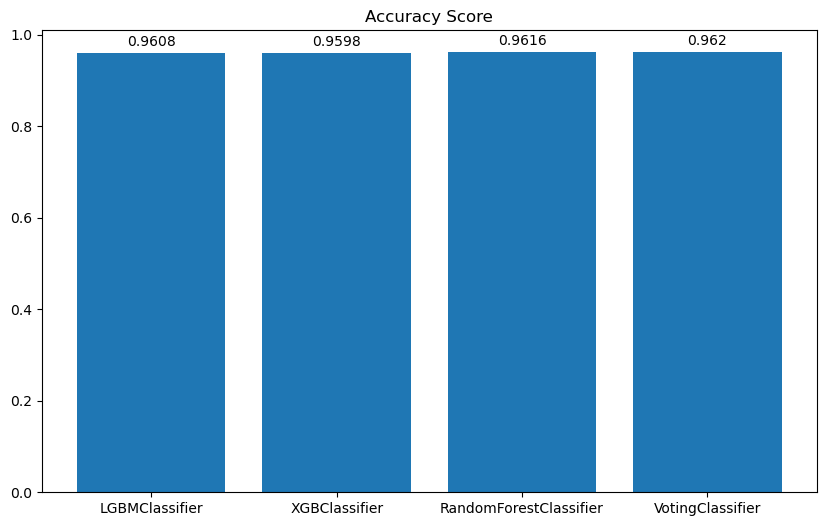

In [216]:
acc = [0.9608, 0.9598, 0.9616, 0.9620]
mod = ['LGBMClassifier', 'XGBClassifier', 'RandomForestClassifier','VotingClassifier']

# Create a figure object
fig = plt.figure(figsize=(10,6))

# Add a subplot to the figure
ax = fig.add_subplot(111)
bars = ax.bar(mod, acc)

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
    textcoords="offset points", ha='center', va='bottom')
plt.title('Accuracy Score')
plt.show()

In [189]:
prepared_test_target

array([1, 1, 0, ..., 0, 1, 0])

[CV] END bootstrap=False, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time= 2.7min
[CV] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=  35.9s
[CV] END bootstrap=False, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time= 2.7min
[CV] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=  35.6s
[CV] END bootstrap=False, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time= 2.7min
[CV] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=  36.0s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=100; total time=   2.9s
[CV] END bootstrap=False, max_depth=5, 

In [243]:
from sklearn.metrics import roc_curve, auc

y_pred = voting_clf.predict_proba(prepared_test_data)
fpr, tpr, thresholds = roc_curve(np.array(prepared_test_target), np.array(y_pred[:,1]))
roc_auc = auc(fpr, tpr)

In [244]:
rocplot = pd.DataFrame()
rocplot['fpr'], rocplot['tpr']=fpr, tpr

roc_auc

0.9946775922448787

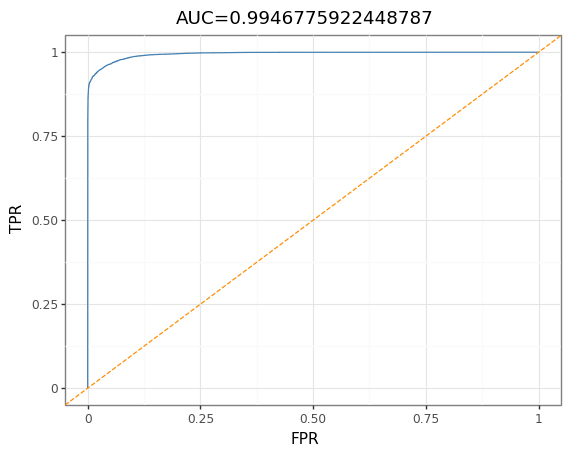

<ggplot: (688721467)>

In [245]:
%matplotlib inline
from plotnine import *

(ggplot(data=rocplot, mapping=aes(x='fpr', y='tpr'))+
geom_line(color='steelblue')+
ggtitle(f'AUC={roc_auc}')+
geom_abline(linetype='dashed', color='darkorange')+
 ylab("TPR")+
 xlab("FPR")+
 theme_bw()
)

In [242]:
y_pred = voting_clf.predict_proba(prepared_test_data)
y_pred[:,1]

array([9.95099930e-01, 9.99949236e-01, 3.60899906e-04, ...,
       9.94433139e-04, 9.98905069e-01, 5.68635815e-04])